# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:
     # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try:         
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.00)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=hermanus
Processing Record 2 | Jackville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=jacqueville
Processing Record 3 | Vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=vaini
Processing Record 4 | Torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=torbay
Processing Record 5 | Marquette
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=marquette
Processing Record 6 | Mao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=mao
Processing Record 7 | Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5

Processing Record 56 | Jinchang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=jinchang
Processing Record 57 | Yushu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=yushu
Processing Record 58 | Simao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=simao
Processing Record 59 | Bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=bluff
Processing Record 60 | Vardo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=vardo
Processing Record 61 | Ribeira Grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=ribeira grande
Processing Record 62 | Kassala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=kassala
Proces

Processing Record 113 | Yar-Sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=yar-sale
Processing Record 114 | Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=arraial do cabo
City not found. Skipping...
Processing Record 115 | College
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=college
Processing Record 116 | Hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=hobart
Processing Record 117 | Alice
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=alice
Processing Record 118 | Albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=albany
Processing Record 119 | Tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50

Processing Record 169 | Bandarbeyla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=bandarbeyla
Processing Record 170 | Ixtapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=ixtapa
Processing Record 171 | Namibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=namibe
Processing Record 172 | Rocha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=rocha
Processing Record 173 | Hamilton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=hamilton
Processing Record 174 | Hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=hambantota
Processing Record 175 | Mocuba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=

Processing Record 224 | Upata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=upata
City not found. Skipping...
Processing Record 225 | Saint-Joseph
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=saint-joseph
Processing Record 226 | Thaton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=thaton
Processing Record 227 | Prince Rupert
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=prince rupert
Processing Record 228 | Bambanglipuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=bambanglipuro
Processing Record 229 | Aswan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=aswan
Processing Record 230 | Trincomalee
http://api.openweathermap.org/data/2.5/weather?units=I

Processing Record 280 | Miramar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=miramar
Processing Record 281 | Yakeshi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=yakeshi
City not found. Skipping...
Processing Record 282 | Teguise
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=teguise
Processing Record 283 | Nizhniy Tsasuchey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=nizhniy tsasuchey
Processing Record 284 | Torzhok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=torzhok
Processing Record 285 | Luena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=luena
Processing Record 286 | Ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

Processing Record 335 | Mehamn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=mehamn
Processing Record 336 | Skjervoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=skjervoy
Processing Record 337 | Kroya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=kroya
Processing Record 338 | Astaneh-ye Ashrafiyeh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=astaneh-ye ashrafiyeh
City not found. Skipping...
Processing Record 339 | Opatija
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=opatija
Processing Record 340 | Hanmer Springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=hanmer springs
Processing Record 341 | Erzin
http://api.openweathermap.org/data/2.5/weather

Processing Record 390 | Port Moresby
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=port moresby
Processing Record 391 | Touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=touros
Processing Record 392 | Wanaka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=wanaka
Processing Record 393 | Talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=talnakh
City not found. Skipping...
City not found. Skipping...
Processing Record 394 | Trairi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=trairi
Processing Record 395 | Abha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=abha
Processing Record 396 | Fort-Shevchenko
http://api.openweathermap.org/data/2.5/weather?u

Processing Record 445 | Banda Aceh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=banda aceh
Processing Record 446 | Beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=beringovskiy
Processing Record 447 | Beira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=beira
Processing Record 448 | Chau Doc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=chau doc
Processing Record 449 | Zhigansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=zhigansk
Processing Record 450 | Biak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=biak
Processing Record 451 | Tecoanapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d8

Processing Record 501 | Enfield
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=enfield
Processing Record 502 | Arinos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=arinos
Processing Record 503 | Kiama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=kiama
City not found. Skipping...
Processing Record 504 | Aleksandrov Gay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=aleksandrov gay
Processing Record 505 | Zyryanka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=zyryanka
Processing Record 506 | Sampit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=sampit
Processing Record 507 | Iaciara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ec

Processing Record 556 | Shingu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=shingu
Processing Record 557 | Yekaterinogradskaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=yekaterinogradskaya
Processing Record 558 | Sibolga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=sibolga
City not found. Skipping...
Processing Record 559 | Canutama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=canutama
Processing Record 560 | Tucupita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=tucupita
Processing Record 561 | Noumea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50ecdc615db565148942dcb502d0d881&q=noumea
Processing Record 562 | San Francisco
http://api.openweathermap.org/data/2.5/weather?units

In [5]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Save data frame to CSV
weather_data.to_csv("Output/weather_data.csv")

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hermanus,0,ZA,1563761688,54,-34.42,19.24,57.0,11.99
1,Jackville,40,CI,1563761690,94,5.21,-4.42,77.0,6.93
2,Vaini,75,IN,1563761546,94,15.34,74.49,71.6,6.93
3,Torbay,90,CA,1563761692,100,47.66,-52.73,52.0,17.22
4,Marquette,5,US,1563761716,71,46.54,-87.40,57.2,4.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

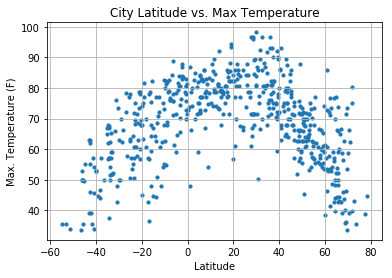

In [6]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/Latitude_vs_Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

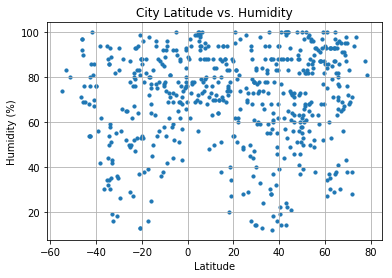

In [7]:

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/Latitude_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

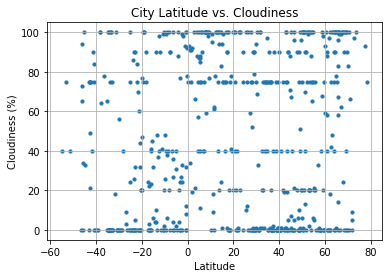

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

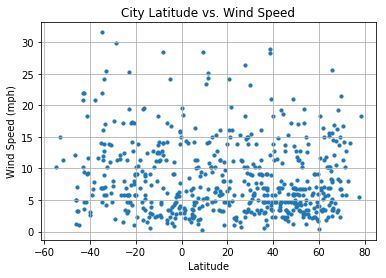

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/Latitude_vs_WindSpeed.png")

# Show plot
plt.show()
